In [1]:
import glob
import pandas as pd
from os import walk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stopwords = ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the","i"]

In [3]:
path=r"C:\Users\Rishav\20_newsgroups"
filenames=glob.glob(path+"/*/**")

In [4]:
print(filenames[1])
#the type of document is in index 4
#so accordingly I will extract Y from it

C:\Users\Rishav\20_newsgroups\alt.atheism\51060


In [5]:
X_files=filenames.copy()
Y_files=[]
for i in range(len(X_files)):
    Y_files.append(filenames[i].split("\\")[4])

In [6]:
from sklearn.model_selection import train_test_split
X_train_files,X_test_files,Y_train,Y_test=train_test_split(X_files,Y_files,random_state=0)
#mind Y_train and Y_test and not Y_train_files and  Y_test_files because i am getting them directly

In [7]:
def makeUnique(data,unique):

    for i in data:
        a=i.lower() #converting into lower case as my stopwords are in lower case
        if((a not in stopwords) and (a not in unique)):
            

            unique.append(a)  #making my unique list

    return unique
        

In [8]:
def load(fname):
    '''Load the file using std open'''

    f=open(fname,"r")  #opening the file
    data=f.read().split()   #extracting the words and storing it in a list named "data"
    
    return data

In [9]:
import glob
import pandas as pd

unique=[]

for file in X_train_files:   


    data=load(file)  #getting all the words of one document at a time in the list named data
    unique=makeUnique(data,unique)   #finding the unique elements from it


In [10]:
#making a copy of unique

uni=unique.copy()

In [11]:
def count(data, uni,frequency):
    
    for i in data:
        a=i.lower()
        if a not in stopwords:
            w=uni.index(a)  #finding the index position of unique word
            frequency[w]+=1  #adding the frequency of each unique word by 1 each time
    return frequency



In [12]:
frequency=np.zeros(len(uni))  #to find the frequency of unique elements

for file in X_train_files: 

    data=load(file)  #getting all the words of one document at a time in the list named data
    frequency=count(data,uni,frequency)
    


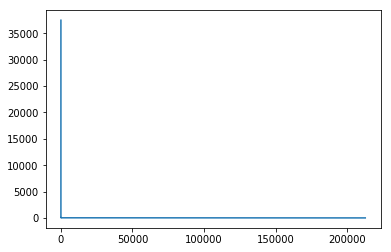

In [13]:

a=frequency.copy()  #making a copy of frequency

Y_axis,X_axis=np.unique(a, return_counts=True)  #this is used to find how many unique words are there of specific frequency like number of unique words with frequencies 1 and then 2 and so on
Y_axis=list(Y_axis)#holds the frequencies                   
X_axis=list(X_axis)#holds the no of words with specific frequency
plt.plot(X_axis,Y_axis)
plt.show()

In [16]:
#clearly deleting the words having frequencies till 100 as they are not of so use on checking the graph


del X_axis[:100]
del Y_axis[:100]


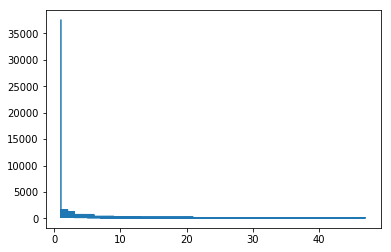

In [19]:
plt.plot(X_axis,Y_axis)
plt.show()

In [20]:
uni=list(unique.copy())  #making a copy and converting it into list
freq=list(frequency.copy()) #making a copy and converting it into list
i=0
while(True):    
    if(i<len(freq)):      
        if freq[i]<=100:  #deleting the unique elements with frequency less than 100
            del freq[i]
            del uni[i]
            continue
        i+=1
    else:
        break

        
        #mind, using while loop as true, because cant use for loop, with each deletion of element, the index changes
        #thus,i am making the check with the len of list each time while running the loop

In [21]:
min(freq)

101.0

In [22]:
def form(data,x,uni,row):
    for i in data:
        if i not in uni:
            continue
        w=uni.index(i)    #finding the index value of the word in my vocabulary
        x[row][w]+=1      #adding 1 in the column as specified
    return x
        

In [23]:

X_train=np.zeros(shape=(len(X_train_files),len(uni)))  #Creating a X_train of size as training files X size of my vocabulary
i=0

for file in X_train_files:
    
    data=load(file)  #getting all the words of one document at a time in the list named data
    X_train=form(data,X_train,uni,i)  
    i+=1

In [24]:
#now, forming X_test
X_test=np.zeros(shape=(len(X_test_files),len(uni)))
i=0
#foor loopp use kar
for file in X_test_files:
    
    data=load(file)
    X_test=form(data,X_test,uni,i)  #in the similar way making X_test
    i+=1


In [25]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.78      0.74       233
           comp.graphics       0.73      0.72      0.72       253
 comp.os.ms-windows.misc       0.73      0.80      0.76       249
comp.sys.ibm.pc.hardware       0.78      0.85      0.82       240
   comp.sys.mac.hardware       0.80      0.85      0.82       236
          comp.windows.x       0.86      0.79      0.82       240
            misc.forsale       0.74      0.80      0.77       261
               rec.autos       0.85      0.87      0.86       269
         rec.motorcycles       0.82      0.91      0.86       284
      rec.sport.baseball       0.81      0.89      0.85       248
        rec.sport.hockey       0.92      0.74      0.82       231
               sci.crypt       0.93      0.85      0.89       233
         sci.electronics       0.88      0.85      0.87       244
                 sci.med       0.92      0.84      0.88       256
         

Implementation Part

In [26]:
def probability(Xa,word,total,uni,rows):
    #print("lol",Xa.shape[0])
    output= np.log(Xa.shape[0]) - np.log(rows) #Xa.shape[0] holds the number of rows of a particular class value, whereas rows hold the total number of X_train rows
    
    w=uni.index(word)    #find the index of the word in vocabulary
    nume=Xa[:,w].sum() + 1   #finding the sum of all the occurance of the particular word and adding 1 for laplace correction
    deno=total + len(uni)  #total holds the sum of all the words of vocabulary of the given required class and len(uni) laplace correction
    pro=np.log(nume) - np.log(deno)   #using log and subtracting numerator and denominator
    output=output+pro
    return output

In [27]:
def construct(X_train,Y_train,uni):
    result={}        
    class_values=set(Y_train)  #extracting all the class values in Y_train
    for i in class_values:     #iteratng over each class value

        result[i]=[]      #making a list for each class value. this list will hold the frequency of the words in the vocabulary
        current_class_rows = (Y_train==i)   #extracting all the rows of Y_train consisting of required class_value

        Xa = X_train[current_class_rows]  #extracting all the rows of Y_train consisting of required class_value
        
        total_sum_of_values_of_class=Xa.sum()  #the sum of all the words of vocabulary of the given required class
        #print(total_sum_of_values_of_class)
        for j in uni:
            m=probability(Xa,j,total_sum_of_values_of_class,uni,X_train.shape[0])    #iterating through each word of vocabulary and sending it to probability function
            #print(m)
            result[i].append(m)  #finally appending it in list
        
    return result
    

In [28]:
Y_train=np.array(Y_train) #very important step as Y_train was a List, converting it to numpy array will come in handy for current_class_rows in predict

dictionary=construct(X_train,Y_train,uni)  #calling construct function to make the dictionary

In [29]:
def check_dict(w,dictionary,current_class):
    return dictionary[current_class][w]

In [30]:
def form2(data,dictionary,uni):
    classes=dictionary.keys()   #class values in the dictionary
    best_p=-1000
    best_class=-1
    first_run=True
    tot=0
    for current_class in classes:   #iterating over all the class values one by one to find the maximum probability
        tot=0
        for i in data:       # iterating over all the words one by one of a document
            if i not in uni:
                continue
            w=uni.index(i)  #  finding the index of the word in vocabulary
            tot+=check_dict(w,dictionary,current_class)  #calling check_dict() to get the required probability with respect to the training data
        if(first_run or tot>best_p):  #finding the best class
            best_p=tot                  #holding the best probability value
            best_class=current_class      #holding the best class
        first_run = False               #this is used to make the best_p and best_class hold the best class only for the very first iteration and then making it false
    return best_class
    

In [31]:

Y_pred=[]
for file in X_test_files:
    data=load(file)
    Y_pred.append(form2(data,dictionary,uni))   #appending the best class in Y_pred


In [33]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.67      0.80      0.73       233
           comp.graphics       0.75      0.70      0.73       253
 comp.os.ms-windows.misc       0.74      0.80      0.77       249
comp.sys.ibm.pc.hardware       0.77      0.85      0.81       240
   comp.sys.mac.hardware       0.77      0.87      0.82       236
          comp.windows.x       0.86      0.81      0.83       240
            misc.forsale       0.74      0.79      0.77       261
               rec.autos       0.86      0.87      0.86       269
         rec.motorcycles       0.90      0.89      0.90       284
      rec.sport.baseball       0.83      0.89      0.86       248
        rec.sport.hockey       0.92      0.77      0.84       231
               sci.crypt       0.91      0.87      0.89       233
         sci.electronics       0.85      0.86      0.85       244
                 sci.med       0.93      0.84      0.88       256
         